# Using Greenland Ice Mapping Project Data Tools + ICESat-2 Data
---

This notebook illustrates some of the various tools and capabilities available to access and explore imagery and velocity data products from the Greenland Ice Mapping Project [GrIMP](https://nsidc.org/grimp). Specifically, we will use the functionality of `nisarVel` and `nisarVelSeries` classes for working with GrIMP velocity products.

This notebook will also include examples of how to quickly explore imagery and velocity mosaics, formatted as cloud optimized GeoTIFF (more on that below) to interactively select and download subsets of GrIMP imagery (NSIDC-0723) and velocity (NSIDC-481, 0725, 0727, 0731, 0766) data. For the Sentinel-based velocity mosaics (0725, 0727, 0731), a user can select a box on a map and choose which components are downloaded (vv, vx, vy, ex, ey, dT) and saved to a netCDF file. 

We will explore some of this functionality, read in and plot velocities over an area of interest, quickly run some statistical calculations to visualize how ice flow has changed, and also evaluate these changes in conjunction with the ICESat-2 ALL06 land ice elevation product. 

![GrIMP header](./images/GrIMP_header.png)

## Environment setup

Generally, GrIMP notebooks use a set of tools that have been tested with the `environment.yml` in the *binder* folder of the [**GrIMP repository**](https://github.com/fastice/GrIMPTools). Thus, for best results when using GrIMP notebooks in the future and in local instances, create a new conda environment to run this and other other GrIMP notebooks from this repository. After downloading the `environment.yml` file, enter the following commands at the command line to prepare your environment. For today's tutorial in CryoCloud, we do not need to perform these steps.

`conda env create -f binder/environment.yml`

`conda activate greenlandMapping`

`python -m ipykernel install --user --name=greenlandMapping`

`jupyter lab`

See [NSIDCLoginNotebook](https://github.com/fastice/GrIMPNotebooks/blob/master/NSIDCLoginNotebook.ipynb) for additional information.

The notebooks can be run on a temporary virtual instance (to start click [**binder**](https://mybinder.org/v2/gh/fastice/GrIMPNotebooks/HEAD?urlpath=lab)). See the github [README](https://github.com/fastice/GrIMPNotebooks#readme) for further details.

```{note}
In order to use the full functionality of GrIMP notebooks for this tutorial, we will pip install two
two packages with functions for reading, subsetting, plotting, and downloading various datasets.
```

In [1]:
%pip install git+https://github.com/fastice/grimpfunc.git@master
%pip install git+https://github.com/fastice/nisardev.git@main

  Cloning https://github.com/fastice/grimpfunc.git (to revision master) to /tmp/pip-req-build-uj62986d
  Running command git clone --filter=blob:none --quiet https://github.com/fastice/grimpfunc.git /tmp/pip-req-build-uj62986d
  Resolved https://github.com/fastice/grimpfunc.git to commit e65a24df129c9702be75209dd981a9748c8def49
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/fastice/nisardev.git (to revision main) to /tmp/pip-req-build-uwikn4e9
  Running command git clone --filter=blob:none --quiet https://github.com/fastice/nisardev.git /tmp/pip-req-build-uwikn4e9
  Resolved https://github.com/fastice/nisardev.git to commit 089abede6fe2bfffb619eeac64419b1568d23474
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you

### Now for the normal imports

/srv/conda/envs/notebook/lib/python3.10/site-packages/IS2view/api.py:52: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
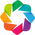

In [2]:
import ipywidgets

import IS2view
import icepyx as ipx
import h5py

# Ignore warnings for tutorial
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import json
import pyproj
import numpy as np
import earthaccess
import glob
import os
import sys
import re
import matplotlib.pyplot as plt
from IPython.display import Image
import rasterio
from rasterio import plot

import dask
from dask.diagnostics import ProgressBar
ProgressBar().register()
dask.config.set(num_workers=2)
import nisardev as nisar
import matplotlib.colors as mcolors
import grimpfunc as grimp
import panel
panel.extension()
from datetime import datetime
import xarray as xr
from shapely.geometry import box, Polygon
os.environ['USE_PYGEOS'] = '0'

import rioxarray

from IPython.lib.deepreload import reload


%load_ext autoreload
%autoreload 2

In [3]:
# For searching NASA data
auth = earthaccess.login()

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
You're now authenticated with NASA Earthdata Login
Using token with expiration date: 10/02/2023
Using .netrc file for EDL




## &#x1F4CC; More tutorial guidance:
See our [YouTube](https://www.youtube.com/@GreenlandIceMappingProject) page for more:

In [4]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/0kIcSXkxaxI" \
     frameborder="0" allow="accelerometer" allowfullscreen></iframe>')

```{note}
**To get help and see options for any of the GrIMP or other functions while the cursor is \
positioned inside a method's parentheses, click shift+Tab.**
```

GrIMP velocity products are stored at NSIDC in cloud-optimized GeoTIFF (COG) format with each component stored as a separate band (e.g., vx, vy, or vv). In this notebook, we focus on the velocity data, but the error and x and y displacement components can be similarly processed.

For reading the data, the products are specified with a single root file name (e.g., for `*filename.vx(vy).othertext.tif*`). For example, the version 3 annual mosaic from December 2017 to November 2018 is specified as `GL_vel_mosaic_Annual_01Dec17_30Nov18_*_v03.0`. For locally stored files, the corresponding path to the data must be provided. For remote data, the https link is required. 

In [5]:
myUrls = grimp.cmrUrls(mode='subsetter')  # Subsetter mode is required for subsetting.
display(myUrls.initialSearch())

Row
    [0] Column(min_width=700)
        [0] Markdown(str)
        [1] Param(cmrUrls, name='Select Product &..., widgets={'product': <class 'panel....}, width=700)
        [2] Row
            [0] Markdown(str)
            [1] Markdown(str)
    [1] Column
        [0] ParamMethod(method, _pane=DataFrame)
        [1] ParamMethod(method, _pane=Markdown)
        [2] ParamMethod(method, _pane=Markdown)

This cell will pop up a search tool for the GrIMP products, which will run a predefined search for the annual products. While in principle, other products (e.g., six-day to quarterly can be retrieved, the rest of the notebook will need some modifications to accommodate).

## Preload Data and Select Bands
The cells in this section read the cloud-optimized geotiffs (COG) headers and create nisarVelSeries or nisarImageSeries objects for velocity or image data, respectively. The actual data are not downloaded at this stage, but the xarray internal to each object will read the header data of each product so it can efficiently access the data during later downloads. The bands (e.g., vx, vy) can be selected at this stage.

More detail can found on working with these tools in the workingWithGrIMPVelocityData and workingWithGrIMPImageData notebooks. 

```{note}
The  nisar class is used to read, display, velocity maps with a single time stamp. In this example, the `readSpeed=False` (default) forces the speed to be calculated from the individual components rather than read from a file, which is much quicker.

: Here is an example of how to access header information remotely and see the structure and total size of your potential download

:     myVelSeries = nisar.nisarVelSeries() 
      myVelSeries.readSeriesFromTiff(myUrls.getCogs(replace='vv', removeTiff=True), url=True, readSpeed=False, useErrors=True, useDT=True)  
      myVelSeries.xr
```

## For now, let's use a local files to see examples of these returns

In [6]:
myVelSeries = nisar.nisarVelSeries() # Initialize a nisarVelSeries instance:
localUrl = '/home/jovyan/shared-public/GeoTIFF/GL_vel_mosaic_Annual_01Dec20_30Nov21_*_v04.0'
myVelSeries.readSeriesFromTiff([localUrl], useDT=False,useErrors=False,readSpeed=True,url=False,useStack=True,overviewLevel=1)  
myVelSeries.xr

<xarray.DataArray 'VelocitySeries' (time: 1, band: 3, y: 3425, x: 1896)>
dask.array<concatenate, shape=(1, 3, 3425, 1896), dtype=float32, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) <U2 'vx' 'vy' 'vv'
  * x            (x) float64 -6.587e+05 -6.579e+05 ... 8.567e+05 8.575e+05
  * y            (y) float64 -6.395e+05 -6.403e+05 ... -3.378e+06 -3.379e+06
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2021-06-01
    name         <U4 'None'
    _FillValue   (band) float64 -2e+09 -2e+09 -1.0
    time1        datetime64[ns] 2020-12-01
    time2        datetime64[ns] 2021-11-30

## &#x2705; Examining interesting velocity map features

 We can use the: 
 ```
     myVelSeries = nisar.nisarVelSeries.displayVelForDate()
```
function to plot the velocity map for the annual mosaic nearest the user-provided date   &#x2B07;. 

[########################################] | 100% Completed | 343.68 ms
[########################################] | 100% Completed | 101.74 ms


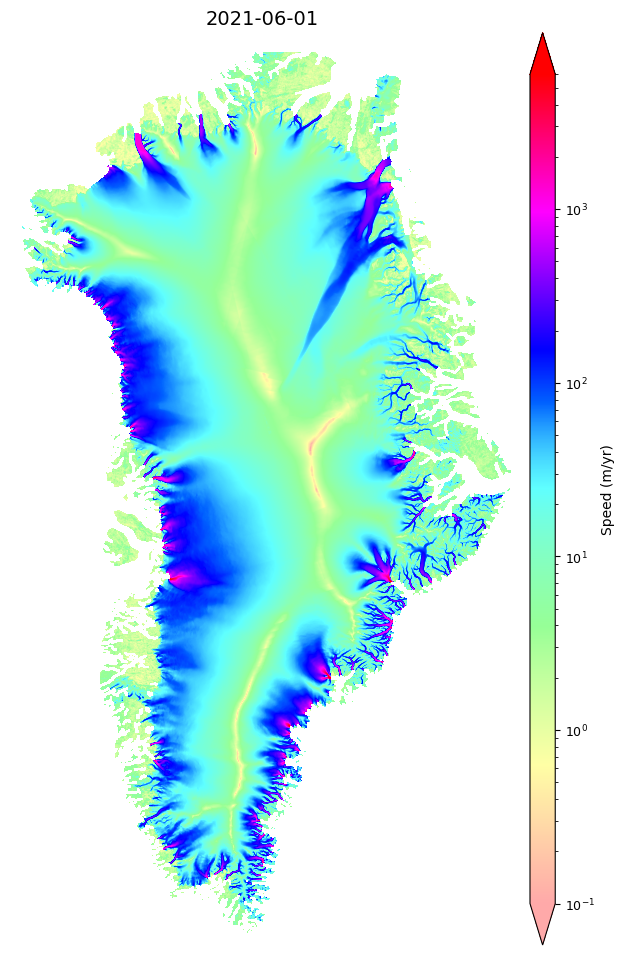

In [7]:
myVelSeries.displayVelForDate('2021-06-01',labelFontSize=10, plotFontSize=9, titleFontSize=14, 
                              vmin=0, vmax=6000,scale='log',colorBarPad=0.15,units='km', axisOff=True)

## &#x1F6A8; **These files can be large!**

Below are functions that allow you to quickly *subset the data by spatial bounds*, including the functions you can use to interactively select an ROI when exploring datasets remotely

## Method 1: Interactive ROI Selection
Run the next the tool below to select the bounding box (or modify a manually selected box), which will display a SAR image map. Depending on network speed, it could take a few seconds to a minute to load the basemap. Use the box tool in the plot menu to select a region of interest. 

```{admonition} Interactive ROI selection
:
:     if 'boxPicker' not in locals(): # Only create if not defined above
          boxPicker = grimp.boxPicker()
      boxPicker.plotMap(show=(not myUrls.checkIDs(['NSIDC-0481']) and not myUrls.checkIDs(['NSIDC-0646'])))
```

## Method 2: Manual Selection
The coordinates for bounding box, bbox, can be manually entered by modifying the cell below with the desired values. Even if not using interactive selection, running that step displays the manually selected box coordinates on a radar map of Greenland. Note by default, coordinates are rounded to the nearest kilometer. We will use a predefined `bbox` for the tutorial today.

In [8]:
values = np.around([-472889, -2540695, -453487, -2523127])
xyBounds = dict(zip(['minx', 'miny', 'maxx', 'maxy'], values))
xyBounds

myVelSeries.subSetVel(xyBounds)
myVelSeries.subset

<xarray.DataArray 'VelocitySeries' (time: 1, band: 3, y: 22, x: 25)>
dask.array<getitem, shape=(1, 3, 22, 25), dtype=float32, chunksize=(1, 1, 22, 25), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) <U2 'vx' 'vy' 'vv'
  * x            (x) float64 -4.731e+05 -4.723e+05 ... -4.547e+05 -4.539e+05
  * y            (y) float64 -2.524e+06 -2.524e+06 ... -2.54e+06 -2.54e+06
  * time         (time) datetime64[ns] 2021-06-01
    name         <U4 'None'
    _FillValue   (band) float64 -2e+09 -2e+09 -1.0
    time1        datetime64[ns] 2020-12-01
    time2        datetime64[ns] 2021-11-30
    spatial_ref  int64 0

The data in the above example map are stored as an Xarray, velMap.subset. In this case, the subset is the full map of Greenland for one time slice. The full time series of Greenland-wide mosiacs can reach sizes of > 8GB and may take awhile to download! Because of the lazy open mentioned above, the data have not been downloaded or read from the disk yet. Before applying the final subset, its useful to examine the size of the full data (virtual) array. If the loadDataArray step was successful, this next cell will provide details on the size and organization of the full xarray (prior to any download).

```{admonition} Optionally download subset as netcdf file
The downloaded subset can be saved in a netcdf and reloaded for to velSeries instance for later   analysis.   Note if the data have been subsetted, ONLY the subset will be saved - so it is not a bad idea to check out the dimensions, variable names, and total size of the subset data one last time prior to downloading.

: Add comment on xy bounds           
:     myVelSeries.subSetVel(xyBounds)
      myVelSeries.subset

: Add comment on export to cdf
:     subsetFile = 'steenstrupGlacier_annVel.nc'
      myVelSeries.loadRemote()
      myVelSeries.toNetCDF(subsetFile)
      
```


## For today, however, we are going to assume we have already subset and downloaded our area and variable of interest, and read in velocities over Steenstrup Glacier, Greenland.

In [9]:
# Now reload the downloaded data
myVelReload = nisar.nisarVelSeries() 
myVelReload.readSeriesFromNetCDF('./res/steenstrupGlacier_annVel.nc')
myVelReload.loadRemote()

In [10]:
myVelReload.xr #confirm dimensions of read-in subsetted velocities

<xarray.DataArray 'VelocitySeries' (time: 7, band: 3, y: 351, x: 306)>
array([[[[ 1.11676419e+00,  1.59998286e+00,  1.70799983e+00, ...,
           2.30640930e+02,  1.47605362e+02,  6.85445480e+01],
         [ 6.27350628e-01,  1.19134200e+00,  1.44590247e+00, ...,
           2.89960114e+02,  2.18558105e+02,  1.22185051e+02],
         [-1.73795328e-01,  1.81840569e-01,  1.62274435e-01, ...,
           3.05869354e+02,  2.55354233e+02,  1.62863892e+02],
         ...,
         [-4.73510027e+00, -5.52709627e+00, -5.25623894e+00, ...,
                      nan,             nan,             nan],
         [-2.86730933e+00, -3.33576107e+00, -3.83880162e+00, ...,
                      nan,             nan,             nan],
         [-1.34066474e+00, -1.90317583e+00, -2.72140670e+00, ...,
                      nan,             nan,             nan]],

        [[-5.82537270e+00, -5.66549730e+00, -5.22123241e+00, ...,
          -1.92974136e+02, -1.38507278e+02, -8.94227600e+01],
         [-4.98156023e+00, -4.58929014e+00, -3.94673991e+00, ...,
          -2.78241943e+02, -2.42269043e+02, -1.87016388e+02],
         [-4.90611362e+00, -4.50508499e+00, -3.54733062e+00, ...,
          -3.45336029e+02, -3.39918884e+02, -2.98722015e+02],
...
                      nan,             nan,             nan],
         [ 2.78865981e+00,  3.08081293e+00,  4.41497707e+00, ...,
                      nan,             nan,             nan],
         [ 6.93372369e-01,  2.12009978e+00,  3.43272281e+00, ...,
                      nan,             nan,             nan]],

        [[ 1.84553146e+00,  1.68653011e+00,  1.81761539e+00, ...,
           3.44428375e+02,  2.52386292e+02,  1.46040314e+02],
         [ 2.93052220e+00,  2.40399122e+00,  1.62190270e+00, ...,
           4.64432281e+02,  3.87946686e+02,  2.72755463e+02],
         [ 3.41516590e+00,  3.03598475e+00,  2.22783017e+00, ...,
           5.79738403e+02,  5.25995850e+02,  4.15923523e+02],
         ...,
         [ 6.43459558e+00,  7.29936552e+00,  7.30895853e+00, ...,
                      nan,             nan,             nan],
         [ 3.84925318e+00,  4.81166029e+00,  5.59751654e+00, ...,
                      nan,             nan,             nan],
         [ 3.06430936e+00,  3.67955160e+00,  4.11497211e+00, ...,
                      nan,             nan,             nan]]]],
      dtype=float32)
Coordinates:
    _FillValue   float64 -1.0
  * time         (time) datetime64[ns] 2015-06-01 ... 2021-06-01
    id           (time) object 'https://n5eil01u.ecs.nsidc.org/DP4/MEASURES/N...
  * band         (band) object 'vx' 'vy' 'vv'
  * x            (x) float64 4.19e+05 4.192e+05 4.194e+05 ... 4.798e+05 4.8e+05
  * y            (y) float64 -2.486e+06 -2.486e+06 ... -2.556e+06 -2.556e+06
    epsg         int64 3413
    name         <U4 'temp'
    time1        (time) datetime64[ns] 2014-12-01 2015-12-01 ... 2020-12-01
    time2        (time) datetime64[ns] 2015-11-30 2016-11-30 ... 2021-11-30
    spatial_ref  int64 0
Attributes:
    grid_mapping:  spatial_ref

## We can plot the annual velocity maps for Steenstrup Glacier. 

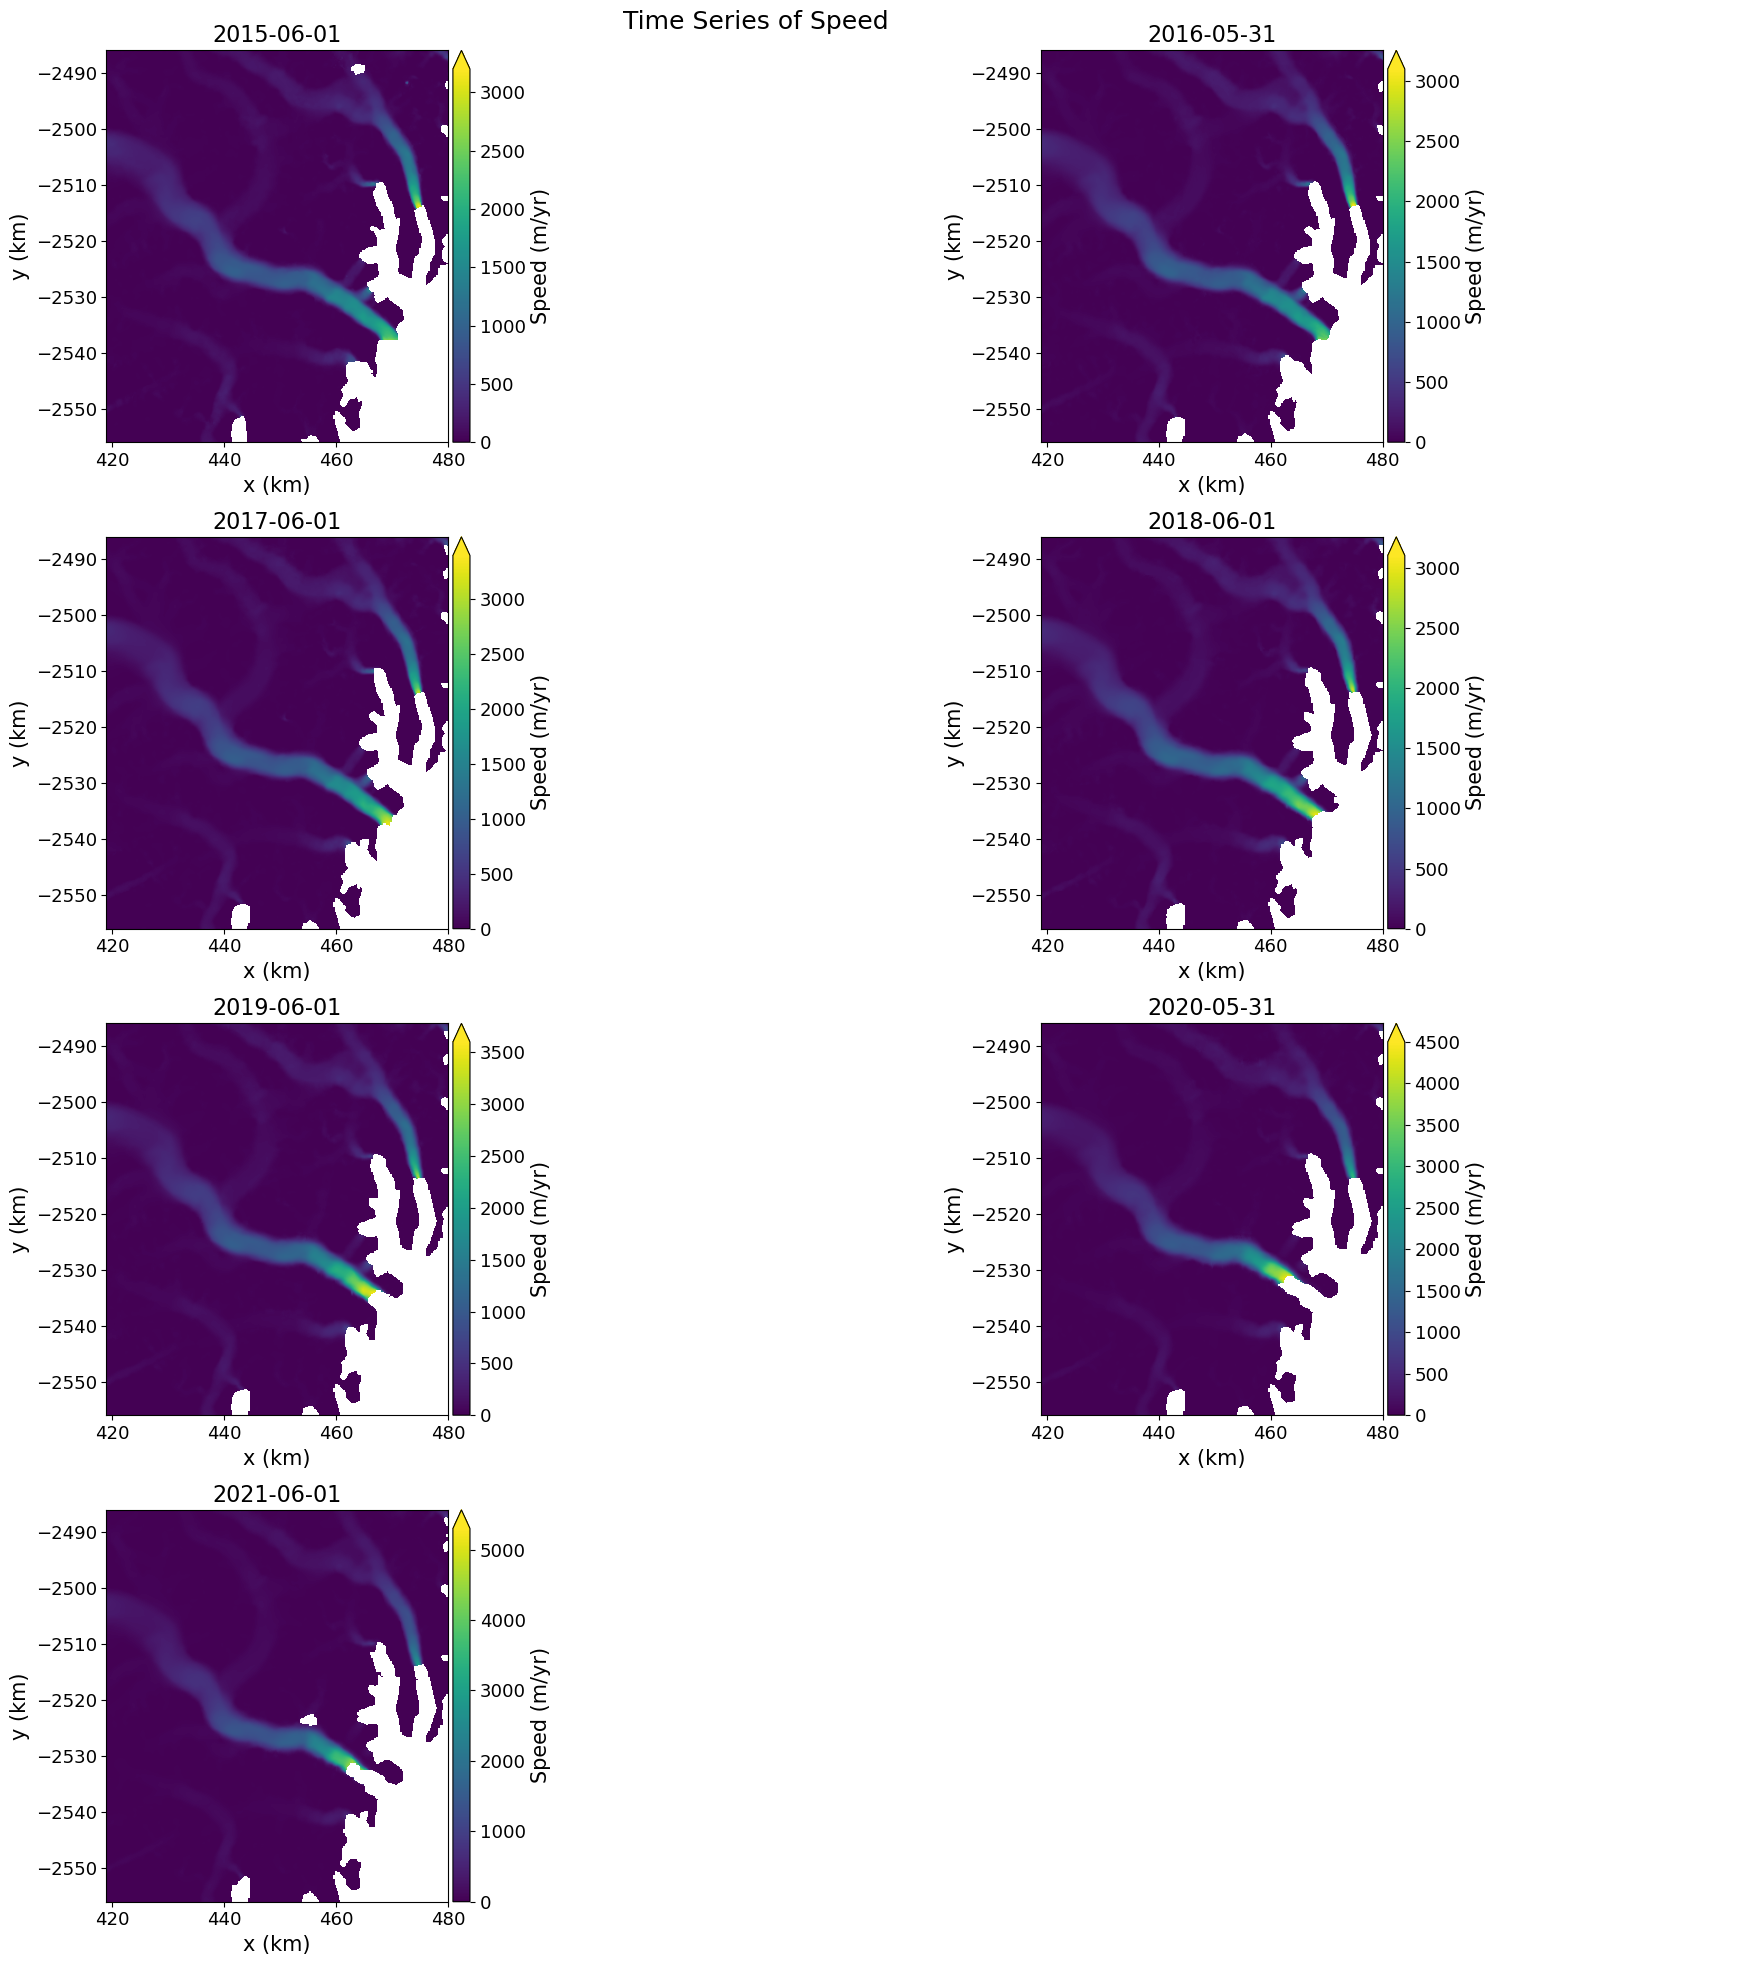

In [11]:
fig, axes = plt.subplots(4, 2,figsize=(20,20))

for ax, date in zip(axes.flatten(), myVelReload.time): 
    myVelReload.displayVelForDate(date=date, ax=ax,units='km')
axes[-1, -1].axis('off'); #remove any empty axes if odd number of years
fig.suptitle('Time Series of Speed', fontsize=18)
fig.tight_layout()

## &#x1F4C8; Explore multiyear trends using the interactive inspection tool in the cell block below &#x2B07;


In [12]:
myVelReload.inspect()

HoloViews(Layout)

## &#x1F4CA; Quickly plot velocity anomalies
computes [velocity at t_i - mean] of all timesteps in data series

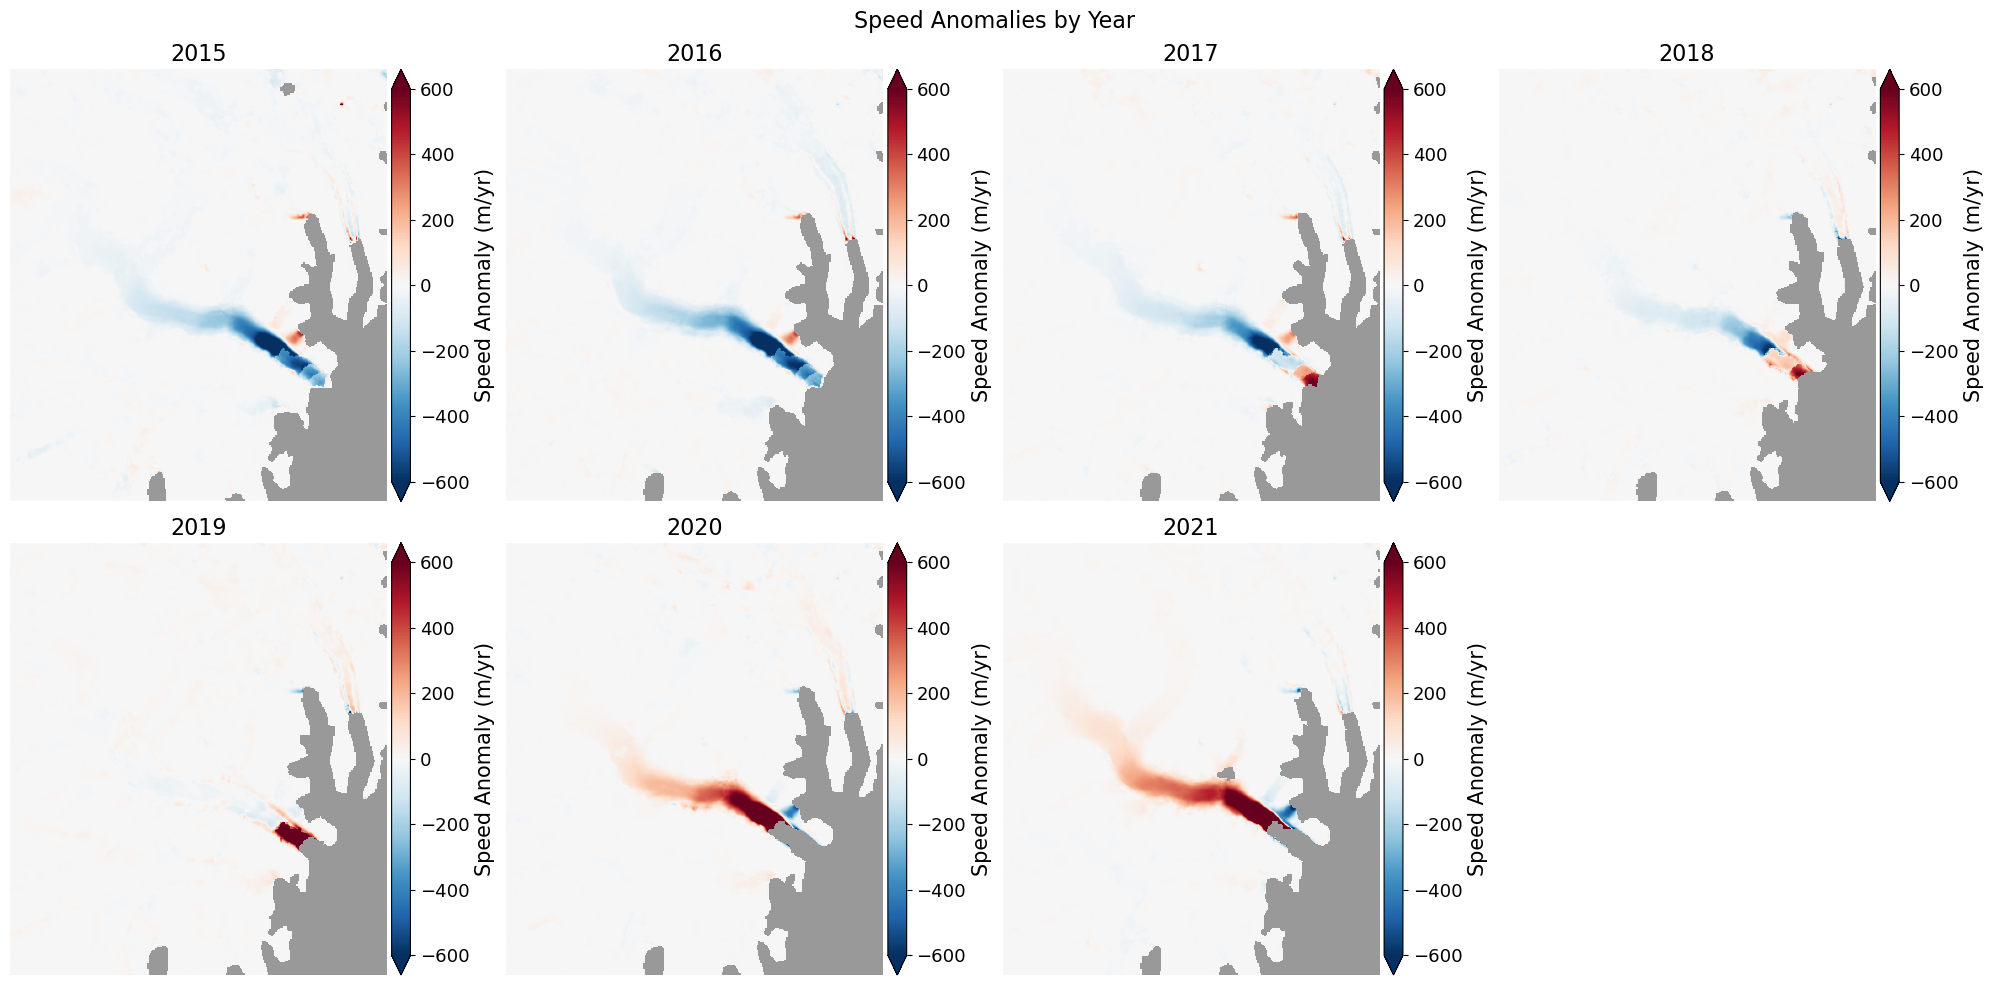

In [13]:
velAnomaly = myVelReload.anomaly()

# Plot the anomaly for each year
fig, axes = plt.subplots(2, 4, figsize=(20,10))
for date, ax in zip(velAnomaly.time, axes.flatten()):
    velAnomaly.displayVelForDate(date, ax=ax, units='m', vmin=-600, vmax=600, autoScale=False, axisOff=True,
                                 title=date.strftime("%Y"),cmap='RdBu_r', colorBarLabel='Speed Anomaly (m/yr)', 
                                 extend='both',backgroundColor=(0.6, 0.6, 0.6))
axes[-1, -1].axis('off'); # kill axis with no plot
fig.suptitle('Speed Anomalies by Year', fontsize=16)
fig.tight_layout()

## Dynamic Thinning at ice sheet margins
Typically, we expect a rapid acceleration in ice flow to also correspond with dynamic ice thinning. Let's use ICESat-2 data to see if that is true for Steenstrup Glacier.

![glacier thinning](./images/dynamic_thinning_schematic.png)

```{admonition} Accessing from the cloud (outside of tutorial)
Follow the example block of code below to access non-local data outside of tutorial  

: Give ROI, product, and temporal range to query using icepyx
:     spatial_extent = [-34.8799,66.4665,-34.3847,66.6506]
      region_a = ipx.Query('ATL06',spatial_extent,['2019-01-01','2021-12-31'])
      region_a.earthdata_login()
      
: Explore variables, select those of interest and download submitted granule order.
:     region_a.show_custom_options(dictview=True)
      region_a.order_vars.avail(options=True)
      region_a.visualize_spatial_extent()
      region_a.download_granules('/home/jovyan/icesat2data') #download path (replace with preferred directory)
```

## Use Ben Smith's function to read in ATL06 (ICESat-2 land ice product) data from local files

In [14]:
def atl06_to_dict(filename, beam, field_dict=None, index=None, epsg=None):
    """
        Read selected datasets from an ATL06 file

        Input arguments:
            filename: ATl06 file to read
            beam: a string specifying which beam is to be read (ex: gt1l, gt1r, gt2l, etc)
            field_dict: A dictinary describing the fields to be read
                    keys give the group names to be read, 
                    entries are lists of datasets within the groups
            index: which entries in each field to read
            epsg: an EPSG code specifying a projection (see www.epsg.org).  Good choices are:
                for Greenland, 3413 (polar stereographic projection, with Greenland along the Y axis)
                for Antarctica, 3031 (polar stereographic projection, centered on the Pouth Pole)
        Output argument:
            D6: dictionary containing ATL06 data.  Each dataset in 
                dataset_dict has its own entry in D6.  Each dataset 
                in D6 contains a numpy array containing the 
                data
    """
    if field_dict is None:
        field_dict={None:['latitude','longitude','h_li', 'atl06_quality_summary'],\
                    'ground_track':['x_atc','y_atc'],\
                    'fit_statistics':['dh_fit_dx', 'dh_fit_dy']}
    D={}
    file_re=re.compile('ATL06_(?P<date>\d+)_(?P<rgt>\d\d\d\d)(?P<cycle>\d\d)(?P<region>\d\d)_(?P<release>\d\d\d)_(?P<version>\d\d).h5')
    with h5py.File(filename,'r') as h5f:
        for key in field_dict:
            for ds in field_dict[key]:
                if key is not None:
                    ds_name=beam+'/land_ice_segments/'+key+'/'+ds
                else:
                    ds_name=beam+'/land_ice_segments/'+ds
                if index is not None:
                    D[ds]=np.array(h5f[ds_name][index])
                else:
                    D[ds]=np.array(h5f[ds_name])
                if '_FillValue' in h5f[ds_name].attrs:
                    bad_vals=D[ds]==h5f[ds_name].attrs['_FillValue']
                    D[ds]=D[ds].astype(float)
                    D[ds][bad_vals]=np.NaN
    if epsg is not None:
        xy=np.array(pyproj.proj.Proj(epsg)(D['longitude'], D['latitude']))
        D['x']=xy[0,:].reshape(D['latitude'].shape)
        D['y']=xy[1,:].reshape(D['latitude'].shape)
    temp=file_re.search(filename)
    D['rgt']=int(temp['rgt'])
    D['cycle']=int(temp['cycle'])
    D['beam']=beam
    return D

In [15]:
# Read in local SAR mosaic of our glacier of interest
img_name = '/home/jovyan/shared-public/GeoTIFF/GL_S1bks_mosaic_uncalibrated._2021-08-05.tif'
img = rasterio.open(img_name)

# read in first band of imagery
array = img.read(1)
array[array < 0] = 0

# Read ATL06 land ice elevation from GT2l track
ATL06_file0=('./res/processed_ATL06_20191106230008_06270503_006_01.h5')
D0=atl06_to_dict(ATL06_file0,'/gt2l', index=None, epsg=3413)
ATL06_file1=('./res/processed_ATL06_20211102121853_06271303_006_01.h5')
D1=atl06_to_dict(ATL06_file1,'/gt2l', index=None, epsg=3413)

## Now plot ICESat-2 and velocity change together to evaluate if dynamic thinning occurred

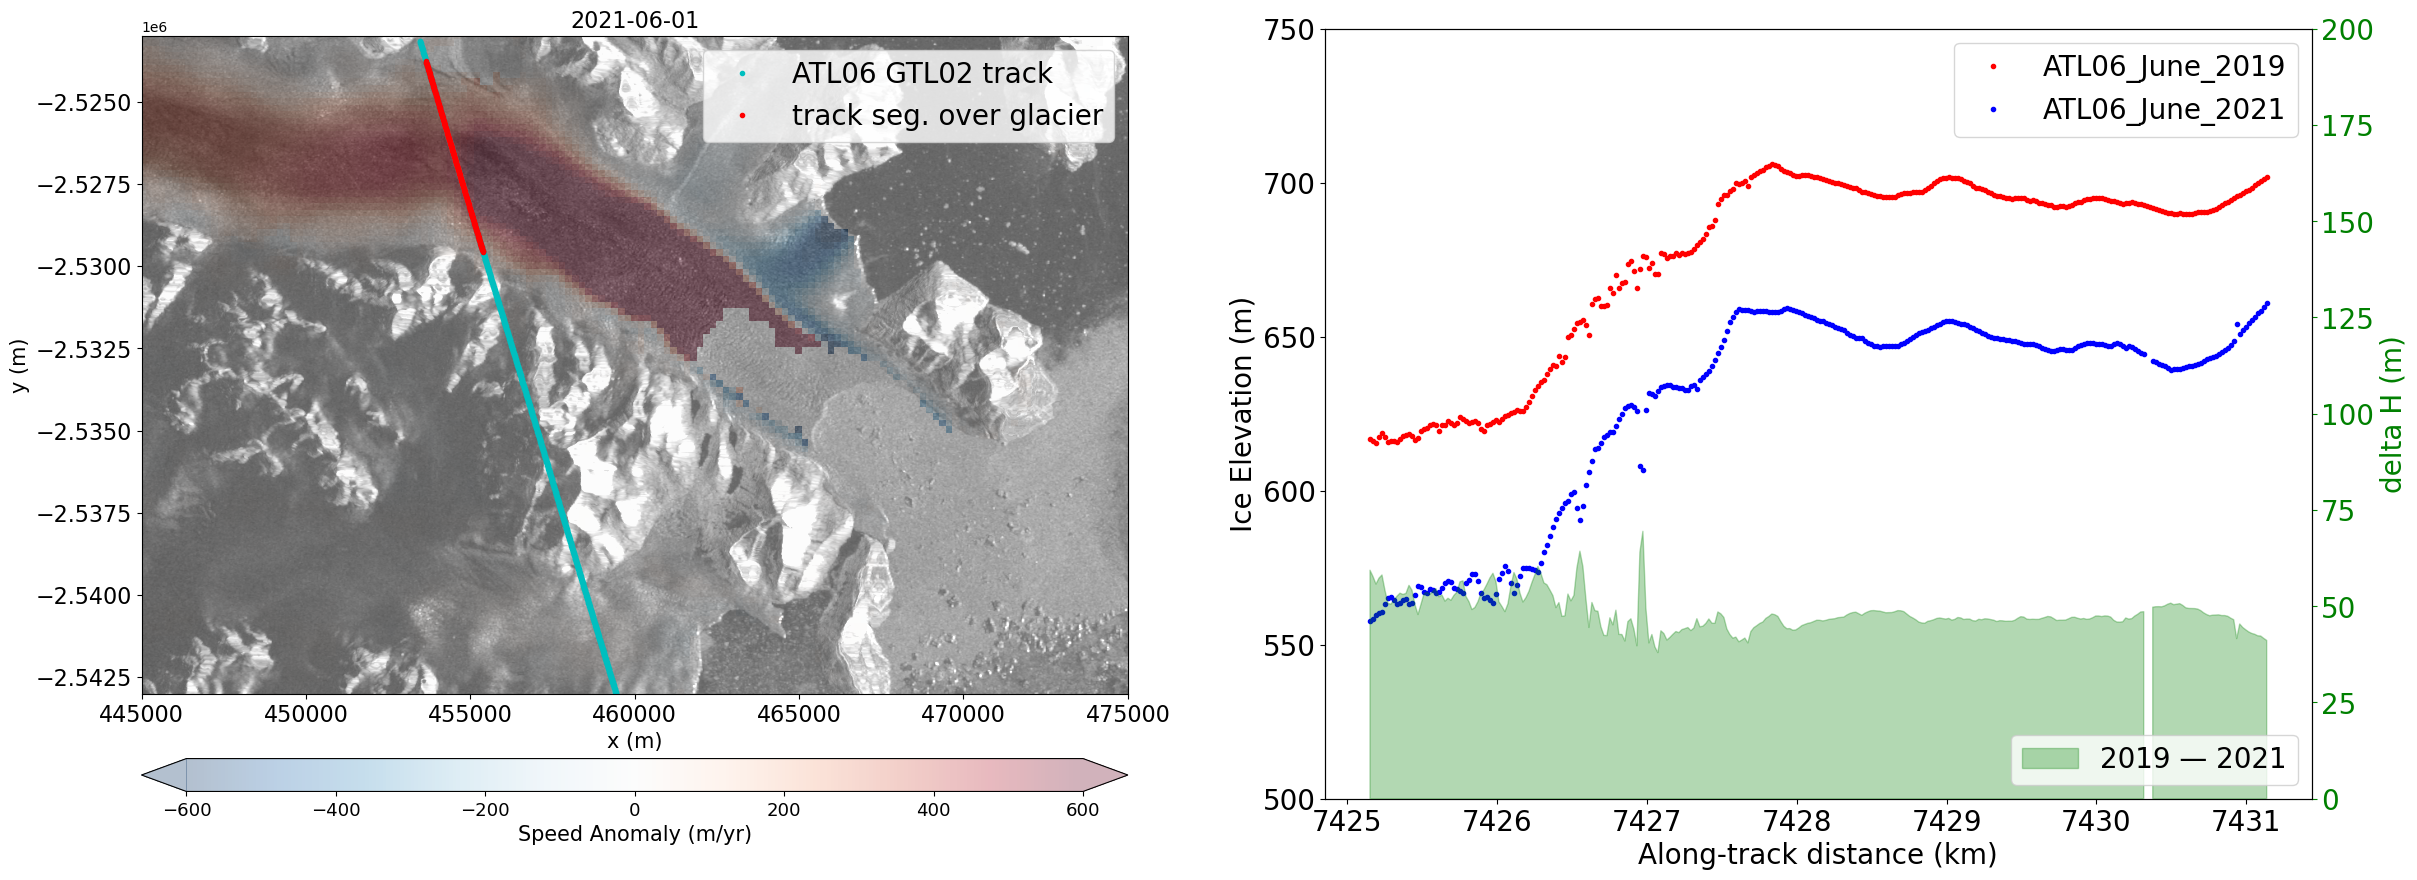

In [16]:
fig = plt.figure(figsize=(28,10))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

#ax1
bounds = np.linspace(-15, 210, 255)
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
rasterio.plot.show(array,ax=ax1,cmap='gist_gray',transform=img.transform,norm=norm)
velAnomaly.displayVelForDate('2021-06-01', ax=ax1, units='m', vmin=-600, vmax=600, autoScale=False,colorBarPosition='bottom',
                        colorBarPad=0.65,colorBarSize='5%',cmap='RdBu_r', colorBarLabel='Speed Anomaly (m/yr)', 
                        extend='both',alpha=0.3)

ax1.plot(D1['x'], D1['y'],'c.',label='ATL06 GTL02 track')
ax1.plot(D1['x'][700:1000], D1['y'][700:1000],'r.',label='track seg. over glacier')
ax1.set_xlim(445000,475000)
ax1.set_ylim(-2543000,-2523000)
ax1.legend(fontsize=20);
ax1.tick_params(axis='both', labelsize=16)

#ax2
ax2.plot(0.001*D0['x_atc'][700:1000], D0['h_li'][700:1000],'r.', label='ATL06_June_2019')
ax2.plot(0.001*D1['x_atc'][700:1000], D1['h_li'][700:1000],'b.', label='ATL06_June_2021')
ax2.set_ylim(500,750)
ax2.tick_params(axis='both', labelsize=20)
ax2.set_ylabel('Ice Elevation (m)',fontsize=20)
ax2.set_xlabel('Along-track distance (km)',fontsize=20)
ax2.legend(fontsize=20); 

#calculate 2019 - 2021 difference in elevation
ax_c = ax2.twinx()

deltaH = D0['h_li'][700:1000]- D1['h_li'][700:1000]
deltaH[deltaH > 200] = np.NaN

ax_c.fill_between(0.001*D0['x_atc'][700:1000],deltaH,color='green',alpha=0.3,label='2019 — 2021')
ax_c.set_ylim(0,200)
ax_c.tick_params(axis='y', labelsize=20,labelcolor='green',color='green')
ax_c.set_ylabel('delta H (m)',fontsize=20,color='green');
ax_c.legend(loc='lower right',fontsize=20); 